# LAB 3
titanic dataset
bin creation


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"rajarshi2712","key":"a06f7ed601b75f0bc378e5d35ad990eb"}'}

In [2]:
!pip install -q kaggle==1.5.12
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emrullahdemirhan/titaniccsv

titaniccsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip titaniccsv.zip

Archive:  titaniccsv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df1=pd.read_csv('titanic.csv')
df2=pd.read_csv('test.csv')

In [7]:
print(df1.head(50))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
2

In [8]:
pd.isnull(df1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
result = df1.drop(['Cabin'], axis=1)
print(result)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
#drop null rows
result = df1.dropna()
print(result)


     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [11]:
# sort the data according to their age in an ascending order

result=result.sort_values(by=['Age'])
print(result)

     PassengerId  Survived  Pclass                                  Name  \
305          306         1       1        Allison, Master. Hudson Trevor   
183          184         1       2             Becker, Master. Richard F   
205          206         0       3            Strom, Miss. Telma Matilda   
297          298         0       1          Allison, Miss. Helen Loraine   
340          341         1       2        Navratil, Master. Edmond Roger   
..           ...       ...     ...                                   ...   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
456          457         0       1             Millet, Mr. Francis Davis   
745          746         0       1          Crosby, Capt. Edward Gifford   
96            97         0       1             Goldschmidt, Mr. George B   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

        Sex    Age  SibSp  Parch     Ticket      Fare    Cabin Embarked  
305    male  

In [12]:
# Now dive them into 3 bins based on age, do not mention the age range, let the function automatically handle that.
# also name the bins

import pandas as pd
result['Age_Group'] = pd.cut(result['Age'], bins=3, labels=['Young', 'Middle-Aged', 'Old'])
print(result)


     PassengerId  Survived  Pclass                                  Name  \
305          306         1       1        Allison, Master. Hudson Trevor   
183          184         1       2             Becker, Master. Richard F   
205          206         0       3            Strom, Miss. Telma Matilda   
297          298         0       1          Allison, Miss. Helen Loraine   
340          341         1       2        Navratil, Master. Edmond Roger   
..           ...       ...     ...                                   ...   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
456          457         0       1             Millet, Mr. Francis Davis   
745          746         0       1          Crosby, Capt. Edward Gifford   
96            97         0       1             Goldschmidt, Mr. George B   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

        Sex    Age  SibSp  Parch     Ticket      Fare    Cabin Embarked  \
305    male 

In [13]:
# count the number of rows in each age bin

result1=result['Age_Group'].value_counts()
print(result1)


Age_Group
Middle-Aged    100
Young           58
Old             25
Name: count, dtype: int64


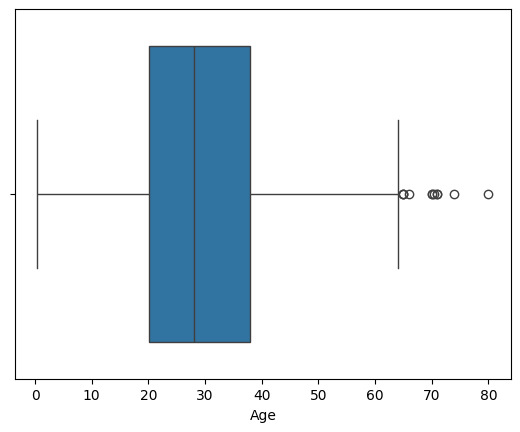

In [14]:
box_pl=sns.boxplot(x=df1['Age'])

In [15]:
q1=df1['Age'].quantile(0.25)
q2=df1['Age'].quantile(0.50)
q3=df1['Age'].quantile(0.75)
print(q1,q2,q3)

20.125 28.0 38.0


In [16]:
# Inter Quantile Range
iqr=q3-q1
print('The Inter-Quantile Range for Age is:', iqr)

The Inter-Quantile Range for Age is: 17.875


In [17]:
# define the outliers for Age using the Quantiles in 'df1'

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df1[(df1['Age'] < lower_bound) | (df1['Age'] > upper_bound)]

print('Outliers for Age:')
print(outliers)

Outliers for Age:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
3

In [18]:
# define the outliers for Age using the Quantiles

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers_r = result[(result['Age'] < lower_bound) | (result['Age'] > upper_bound)]

print('Outliers for Age:')
print(outliers)

Outliers for Age:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
3